In [1]:
import pandas as pd
df = pd.read_pickle('MVOE_catalog.pkl')


In [2]:
print(df.columns)

Index(['path', 'filetime', 'sfile', 'num_traces', 'Fs', 'calib', 'subclass',
       'new_subclass', 'quality', 'weight', 'checked', 'split', 'delete',
       'ignore', 'D', 'R', 'r', 'e', 'l', 'h', 't', 'year', 'month', 'day',
       'hour', 'minute', 'second', 'peaktime', 'peakA', 'peakamp', 'energy',
       'signal_level', 'noise_level', 'snr', 'peakF', 'medianF',
       'bandratio_[0.8_4.0_16.0]', 'bandratio_[1.0_6.0_11.0]', 'bw_max',
       'bw_min', 'sample_min', 'sample_max', 'sample_mean', 'sample_rms',
       'sample_stdev', 'sample_lower_quartile', 'sample_median',
       'sample_upper_quartile', 'kurtosis', 'skewness', 'num_gaps',
       'percent_availability', 'trigger_duration', 'ontime', 'offtime',
       'cft_peak_wmean', 'cft_std_wmean', 'coincidence_sum',
       'detection_quality'],
      dtype='object')


In [19]:
from obspy.core import UTCDateTime
df['utcdatetime'] = [UTCDateTime(row['filetime']) for i,row in df.iterrows()]
df['datetime'] = [row['utcdatetime'].datetime for i,row in df.iterrows()]


<AxesSubplot:>

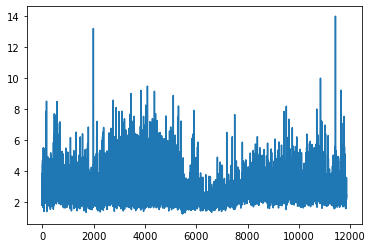

In [23]:
df.set_index('datetime')
df['snr'].plot(x='datetime')

(array([ 9801.,  9815.,  9831.,  9845.,  9862.,  9876.,  9893.,  9907.,
         9921.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

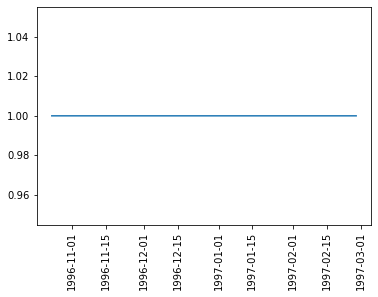

In [21]:
import matplotlib.pyplot as plt
time_series = pd.DataFrame(df['datetime'].value_counts().reset_index())
time_series.columns = ['date', 'count']
time_series = time_series.sort_values('date', ascending=True)
plt.plot(time_series['date'], time_series['count'])
plt.xticks(rotation='vertical')

In [5]:
isinstance(df.iloc[0].filetime, str)

True

In [7]:
df.iloc[0].filetime

'1996-10-23T16:08:00.040000Z'